Импортируем библиотеки. Загружаем данные в ноутбук.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_curve, roc_auc_score, f1_score, fbeta_score, auc
import numpy as np
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Удаляем ненужный столбец.

Посмотрим первые 10 записей из набора данных.

In [ ]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Rain.csv', sep=',')
data=data.drop(['Unnamed: 0'], axis='columns')
data.head(10)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.6,19.2,8.0,4.2,0.4,56.0,20.0,17.0,88.0,94.0,1028.4,1025.4,8.0,8.0,16.0,16.0,1,1
1,24.3,32.3,0.0,5.2,5.2,46.0,11.0,9.0,61.0,96.0,1010.7,1008.5,6.0,7.0,27.9,24.6,0,1
2,22.9,34.8,0.0,9.6,5.3,56.0,19.0,13.0,27.0,25.0,1004.9,1003.4,7.0,7.0,30.6,33.5,0,1
3,17.9,19.4,0.0,2.2,3.1,48.0,26.0,17.0,87.0,82.0,1014.9,1013.5,8.0,7.0,19.0,17.9,0,1
4,15.7,23.4,0.0,7.8,9.6,35.0,15.0,15.0,55.0,64.0,1009.1,1008.8,8.0,7.0,20.4,21.3,0,1
5,21.2,29.8,3.6,6.6,5.4,54.0,26.0,35.0,71.0,52.0,1015.8,1013.1,5.0,7.0,25.5,27.5,1,1
6,13.2,19.1,0.0,1.6,1.2,59.0,13.0,22.0,75.0,71.0,1020.0,1015.7,6.0,7.0,14.7,18.0,0,1
7,7.4,14.9,0.0,1.6,6.0,44.0,17.0,19.0,77.0,63.0,1018.8,1013.8,1.0,7.0,9.1,12.5,0,1
8,19.2,29.8,0.0,5.2,9.9,52.0,9.0,24.0,61.0,57.0,1008.0,1004.9,1.0,1.0,27.7,28.4,0,1
9,8.5,15.6,0.0,2.2,7.6,65.0,28.0,33.0,67.0,44.0,1021.7,1018.3,1.0,7.0,12.0,14.8,0,1


Создаем обучающую и тестовую выборки.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
scaler = MinMaxScaler()
X = data[data.columns[:-1]]
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
y = data['RainTomorrow']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)


# Одиночное дерево

Посчитаем recall при различной глубине дерева.

In [ ]:
accuracy = []
C_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for i in range(0, len(C_list)):
    clf = DecisionTreeClassifier(criterion='entropy', random_state=17,max_depth=C_list[i])
    clf.fit(X_train, y_train)
    a=clf.predict(X_test)
    #pr, rec, _ = precision_recall_curve(y_test, a)
    current_score = recall_score(y_test, a)
    accuracy.append(current_score)
    print('При Depth =', C_list[i], 'recall равен', current_score)
max_score = 0    
for i in range(0, len(accuracy)):
    if max_score < accuracy[i]:
        max_score = accuracy[i]
        C_for_max_score = i
print('\n')
print('Максимальная точность (score), равная', max_score,', получается при Depth, равном', C_list[C_for_max_score])

При Depth = 1 recall равен 0.7587131367292225
При Depth = 2 recall равен 0.7587131367292225
При Depth = 3 recall равен 0.7050938337801609
При Depth = 4 recall равен 0.8016085790884718
При Depth = 5 recall равен 0.8230563002680965
При Depth = 6 recall равен 0.7238605898123325
При Depth = 7 recall равен 0.707774798927614
При Depth = 8 recall равен 0.7050938337801609
При Depth = 9 recall равен 0.7050938337801609
При Depth = 10 recall равен 0.7131367292225201


Максимальная точность (score), равная 0.8230563002680965 , получается при Depth, равном 5


Заметно резкое изменение метрики recall на маленьких глубинах. Скорее всего, это обозначает нестабильность дерева.

In [ ]:
import os
if os.name == 'mac':
    !xcode-select --install
    !/usr/bin/ruby -e "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/master/install)"
    !brew install graphviz

!pip install graphviz
if os.name == 'nt':
    os.environ['PATH'] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'

!pip install pydotplus

In [ ]:
from ipywidgets import Image
from io import StringIO
import pydotplus
from sklearn.tree import export_graphviz

dot_data = StringIO()
export_graphviz(clf, feature_names=['Sunshine', 'RainToday','MinTemp','MaxTemp','Rainfall','Evaporation','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm'], 
                out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(value=graph.create_png())

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x007m\x00\x00\x05\xbc\x08\x06\x00\x00\x00!\xf3Q\xe4\x00\…

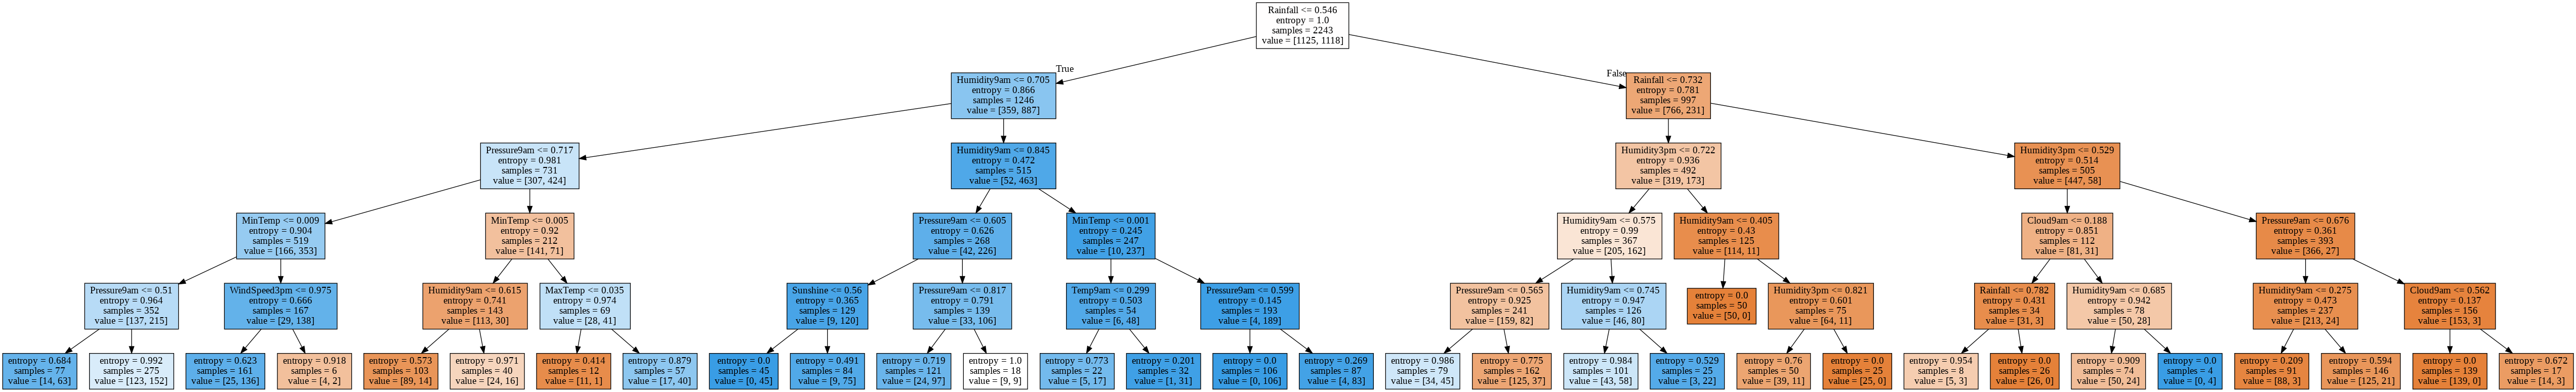

Алгоритм показывает, что самый важный признак - Rainfall(количество осадков за день). С точки зрения логики имеет место быть, учитывая зависимость RainTomorrow от RainToday из 2ой ЛР.

# Лес

Импортируем библиотеки. Обучаем лес с параметрами по умолчанию.

In [ ]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_circles
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 10, 6
%matplotlib inline
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Считаем метрики.

In [ ]:
a=rf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, a))
print('Precision:', precision_score(y_test, a))
print('Recall:', recall_score(y_test, a))
print('ROC AUC:', roc_auc_score(y_test, a))
pr, rec, _ = precision_recall_curve(y_test, a)
print('PRC AUC:', auc(rec, pr))
print('F1:', f1_score(y_test, a))
print('F0.5:', fbeta_score(y_test, a, 0.5))
print('F2:', fbeta_score(y_test, a, 2))

Accuracy: 0.8181818181818182
Precision: 0.8260869565217391
Recall: 0.8260869565217391
ROC AUC: 0.8178053830227744
PRC AUC: 0.8715415019762847
F1: 0.8260869565217391
F0.5: 0.8260869565217391
F2: 0.8260869565217391


Обучаем случайный лес с различными параметрами вручную.

In [ ]:
%%time
dat1 = pd.DataFrame({ 'n_est': [], 'despth': [], 'recall': [] })
for i in range(10, 120, 10):
 for j in range(2,12):
    clf = RandomForestClassifier(n_estimators=i,max_depth=j)
    clf.fit(X_train, y_train)
    a=clf.predict(X_test)
    current_score = recall_score(y_test, a)
    df = pd.DataFrame({'n_est': [i],'depth': [j],'recall': [current_score] })
    dat1=dat1.append(df)
dat1 = dat1.reset_index(drop=True)
max_fr=dat1.iloc[dat1['recall'].argmax()]
print('Лес:\n', max_fr)

Лес:
 n_est     70.000000
despth    11.000000
recall     0.813299
Name: 69, dtype: float64
CPU times: user 23.4 s, sys: 86.9 ms, total: 23.5 s
Wall time: 23.5 s


Recall меньше, т.к. ограничение глубины - 12, а в параметрах по умолчанию, скорее всего, используется более высокое значение.

Сравнение кросс-валидации.

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
a=rf.predict(X_test)
print('Recall:', recall_score(y_test, a))
score_cross_val = cross_val_score(rf, X, y, cv=5, scoring='recall').mean()
print('Cross_val_recall:', score_cross_val)

Recall: 0.8286445012787724
Cross_val_recall: 0.8108796660007631


Кросс-валидация не повлияла на улучшение качества. Значит, модель достаточно объективна, т.к. на двух датасетах дает приблизительно одинаковые результаты.

Определим наиболее значимые параметры.

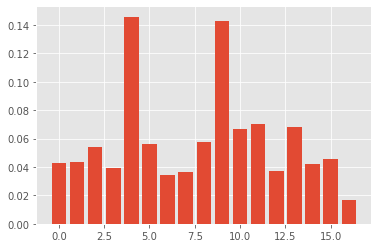

,feature,importance
4,Sunshine,0.145704
9,Humidity3pm,0.142444
11,Pressure3pm,0.070188
13,Cloud3pm,0.068172
10,Pressure9am,0.067028


In [ ]:
fi = pd.DataFrame({'feature': list(X_train.columns),
                   'importance': rf.feature_importances_}).\
                    sort_values('importance', ascending = False)

plt.bar(range(len(rf.feature_importances_)), rf.feature_importances_)
plt.show()
fi.head()

Sunshine, Huminity и Pressure совпадают с результатами L1 регуляризации из 3ей ЛР. Отличие - не хватает WindGustSpeed. 

# Градиентный бустинг

In [ ]:
%%time
from catboost import CatBoostClassifier

max_score_BoostClassifier = -1
dat2 = pd.DataFrame({ 'n_est': [], 'depth': [], 'recall': [] })
for  n_trees in range(10, 120, 10): 
    for  depth in range(2, 12):    
        p = CatBoostClassifier(n_estimators=n_trees, max_depth=depth).fit(X_train, y_train).predict(X_test)
        score = recall_score(y_test, p)
        print('score:', score, '\t n_trees:', n_trees, '\t depth:', depth, '\n')
        df = pd.DataFrame({'n_est': [n_trees],'depth': [depth],'recall': [score] })
        dat2=dat2.append(df)
dat2 = dat2.reset_index(drop=True)
max_grad=dat2.iloc[dat2['recall'].argmax()]

Выходные данные были обрезаны до нескольких последних строк (5000).
29:	learn: 0.4029469	total: 89.3ms	remaining: 89.3ms
30:	learn: 0.4014935	total: 92.2ms	remaining: 86.3ms
31:	learn: 0.3999787	total: 95.2ms	remaining: 83.3ms
32:	learn: 0.3978928	total: 98.2ms	remaining: 80.4ms
33:	learn: 0.3967918	total: 101ms	remaining: 77.3ms
34:	learn: 0.3948413	total: 104ms	remaining: 74.3ms
35:	learn: 0.3930482	total: 107ms	remaining: 71.3ms
36:	learn: 0.3924939	total: 110ms	remaining: 68.2ms
37:	learn: 0.3904700	total: 115ms	remaining: 66.8ms
38:	learn: 0.3887911	total: 120ms	remaining: 64.5ms
39:	learn: 0.3876353	total: 123ms	remaining: 61.4ms
40:	learn: 0.3852868	total: 126ms	remaining: 58.3ms
41:	learn: 0.3825377	total: 129ms	remaining: 55.2ms
42:	learn: 0.3814686	total: 132ms	remaining: 52.1ms
43:	learn: 0.3804053	total: 135ms	remaining: 49ms
44:	learn: 0.3785930	total: 138ms	remaining: 45.9ms
45:	learn: 0.3770939	total: 141ms	remaining: 42.8ms
46:	learn: 0.3765032	total: 144ms	remaining: 3

Сравнение показателей

In [ ]:
print('Градиентный бустинг:\n', max_grad)
print('\nЛес:\n', max_fr)

Градиентный бустинг:
 n_est     50.000000
depth      8.000000
recall     0.813299
Name: 46, dtype: float64

Лес:
 n_est     20.000000
despth    11.000000
recall     0.828645
Name: 19, dtype: float64


Случайный лес без градиентного бустинга обучается ( с подбором параметров) за 23 сек. и имеет recall = 0.82, случайный лес с градиентным бустингом обучается за 1 мин. 24 сек. и имеет recall = 0.81. Лес обучается быстрее, т.к. обучает алгоритмы параллельно, в отличие от градиентного бустинга, который делает это последовательно.